# LAB 1

Author: Sophiya Mehra

Date: 3/3/25

In [69]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad

## Part 1: The Gravitational Potential of the Earth

In [70]:
# definiing gravitational potential function

G = 6.673 * 10**(-11) # m^3 kg^(-1) s^(-2)
def grav_pot(M, xm, ym, x, y):
    if np.isclose(x, xm) and np.isclose(y, ym):
        return np.nan
    else:
        r = np.sqrt((x-xm)**2 + (y-ym)**2)
        GV = G*M / r
        return GV

GV_vec = np.vectorize(grav_pot)

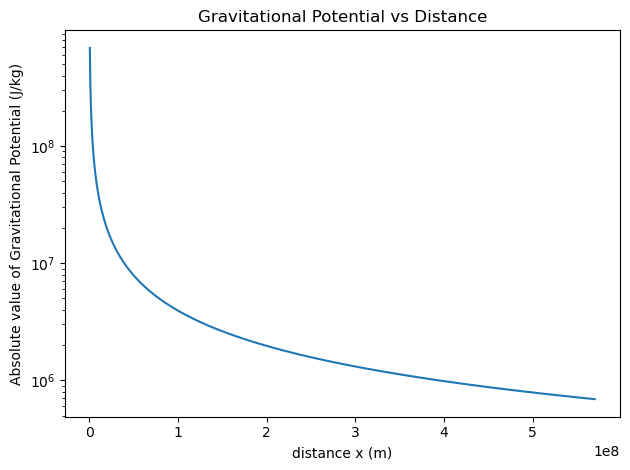

In [71]:
# plotting 1D abs value of gravitational potential

dist_e_m = 3.8*10**8 # m (distance from earth to moon)
Me = 5.9 * 10**24 # kg (mass of earth)

x1 = np.linspace(0, 1.5*dist_e_m, 1000)
y1 = np.full_like(x1, 0)

Grav_e = GV_vec(Me, 0, 0, x1, y1)
fig, ax = plt.subplots(1,1)
ax.plot(x1, np.abs(Grav_e))

ax.set_ylabel("Absolute value of Gravitational Potential (J/kg)")
ax.set_xlabel("distance x (m)")
ax.set_title("Gravitational Potential vs Distance")
ax.set_yscale("log")
fig.tight_layout()

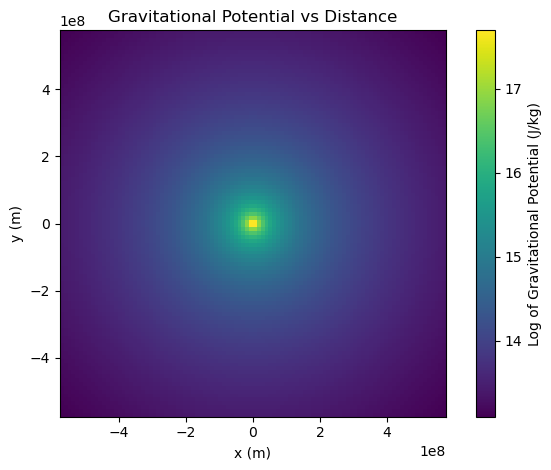

In [84]:
# plotting 2D color mesh

x2 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)
y2 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)

x_grid, y_grid = np.meshgrid(x2,y2)

z = GV_vec(Me, 0, 0, x_grid,y_grid)

fig, ax1 = plt.subplots(1,1)
mesh = ax1.pcolormesh(x_grid, y_grid, np.log(np.abs(z)))

ax1.set_aspect("equal")

cbar = fig.colorbar(mesh)
ax1.set_title("Gravitational Potential vs Distance")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
cbar.set_label("Log of Gravitational Potential (J/kg)")
fig.tight_layout()

## Part 2: The Gravitational Potential of the Earth-Moon System

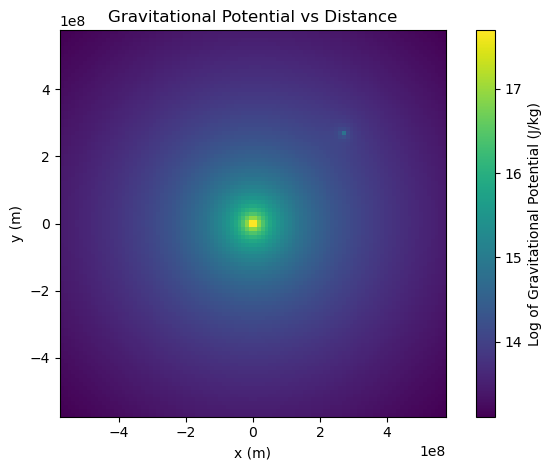

In [85]:
# plotting 2D color mesh of Earth-moon system
Mm = 7.3*10**22 # kg (mass of moon)
x3 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)
y3 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)

x_grid3, y_grid3 = np.meshgrid(x3,y3)

z3 = GV_vec(Me, 0, 0, x_grid3,y_grid3)
zm = GV_vec(Mm, dist_e_m/np.sqrt(2), dist_e_m/np.sqrt(2), x_grid3,y_grid3)
zfinal = z3 + zm

fig, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(x_grid3, y_grid3, np.log(np.abs(zfinal)))

ax2.set_aspect("equal")

cbar = fig.colorbar(mesh)
ax2.set_title("Gravitational Potential vs Distance")
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
cbar.set_label("Log of Gravitational Potential (J/kg)")
fig.tight_layout()

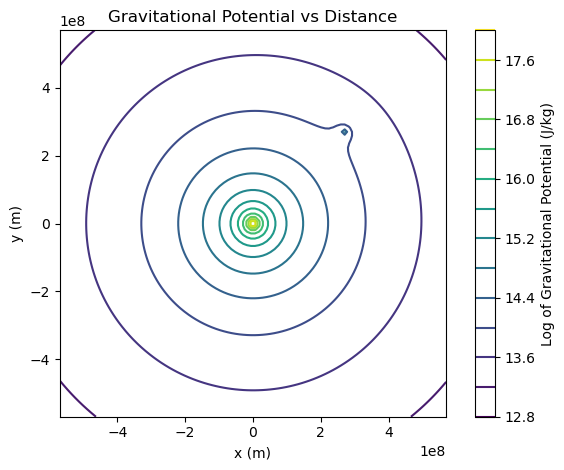

In [86]:
# plotting 2D contour plot

x4 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)
y4 = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,100)

x_grid4, y_grid4 = np.meshgrid(x4,y4)

z4 = GV_vec(Me, 0, 0, x_grid4,y_grid4)
zm = GV_vec(Mm, dist_e_m/np.sqrt(2), dist_e_m/np.sqrt(2), x_grid4,y_grid4)
zfinal1 = z4 + zm

fig, ax3 = plt.subplots(1,1)
mesh = ax3.contour(x_grid4, y_grid4, np.log(np.abs(zfinal1)), 12)

ax3.set_aspect("equal")

cbar = fig.colorbar(mesh)
ax3.set_title("Gravitational Potential vs Distance")
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
cbar.set_label("Log of Gravitational Potential (J/kg)")
fig.tight_layout()

## Part 3: The Gravitational Force Field of the Earth-Moon System

In [75]:
# making gravitational force function

def grav_force(M1, m2, x1, y1, x2, y2,d):
    r_x = x2 - x1
    r_y = y2 - y1
    r = np.array([r_x, r_y])
    r_norm = np.sqrt(r_x**2 + r_y**2)
    r_hat = r / r_norm
    if np.any(r_norm < d):
        return np.nan, np.nan
    else:
        F = -G*M1*m2/(r_norm)**2
        Fx = F * r_hat[0]
        Fy = F * r_hat[1]
        return Fx, Fy

GF_vec = np.vectorize(grav_force)

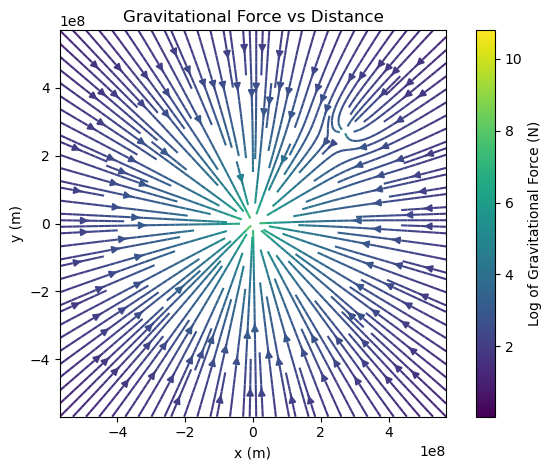

In [87]:
# making 2D streamplot
MA = 5500 # kg (mass of Apollo Command Module)
RE = 6378 * 10**3 # m (radius of earth)
RM = 1737 * 10**3 # m (radius of moon)
ny = 500
nx = 500
x = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,nx)
y = np.linspace(-1.5*dist_e_m,1.5*dist_e_m,ny)

x_grid5, y_grid5 = np.meshgrid(x,y)

Fearthx = GF_vec(Me, MA, 0, 0, x_grid5,y_grid5, RE)[0]
Fearthy = GF_vec(Me, MA, 0, 0, x_grid5,y_grid5, RE)[1]

Fmoonx = GF_vec(Mm, MA, dist_e_m/np.sqrt(2), dist_e_m/np.sqrt(2), x_grid5,y_grid5, RM)[0]
Fmoony = GF_vec(Mm, MA, dist_e_m/np.sqrt(2), dist_e_m/np.sqrt(2), x_grid5,y_grid5, RM)[1]

F_x = Fearthx + Fmoonx
F_y = Fearthy + Fmoony

zx = F_x
zy = F_y


fig, ax4 = plt.subplots(1,1)
colors = np.log(np.hypot(zx,zy))
stream = ax4.streamplot(x_grid5, y_grid5, zx, zy, color=colors,cmap = cm.viridis,density = 2)

ax4.set_aspect("equal")

cbar1 = fig.colorbar(stream.lines)
ax4.set_title("Gravitational Force vs Distance")
ax4.set_xlabel("x (m)")
ax4.set_ylabel("y (m)")
cbar1.set_label("Log of Gravitational Force (N)")
fig.tight_layout()

## Part 4: Altitude of the Saturn V Rocket

In [78]:
# calculating burn time
wet = 2.8 * 10**6 # kg (wet mass)
dry = 7.5 * 10**5 # kg (dry mass)
burn_rate = 1.3 * 10**4 # kg/s (burn rate)
T = (wet - dry)/burn_rate # seconds
print(f"The burn time T of the rocket is {T:.3f} seconds")

The burn time T of the rocket is 157.692 seconds


In [79]:
# defining change in velocity
exhaust = 2.4 * 10**3 # m/s (exhaust velocity)
grav = 9.81 # m/s^2

def vel_change(t, m0=wet, mf=dry, m=burn_rate, ve=exhaust, g=grav):
    if np.any(t > T):
        return 0
    else:
        v = ve * np.log(m0/(m0 - m*t)) - g*t
        return v

In [80]:
# computing altitude of rocket
sum, err = quad(vel_change, 0, T)

print(f"The altitude of the rocket at the end of the burn is {sum:.3f} m")

The altitude of the rocket at the end of the burn is 74093.980 m
